

# Project: Investigate "No-show appointments" Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset contains 100,000 medical appointments in Brazil. The goal of analyzing this data set is to describe and anticipate the patient will or may not show up for the appointment
>
> The Questions will be - Is there a relationship between appointment and 
> - Age 
> - Not receiving SMS 
> - gender

#### <span style='color:orange'> Importing Required Packages  </span>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> Start loading the data. Check the data types and look for missing values, invalid values, and duplicates.

### General Properties

In [2]:
# loading the dataset

df = pd.read_csv(r'C:\Users\ALMJN\Downloads\noshowappointments-kagglev2-may-2016.csv')
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.shape

(110527, 14)

####  The dataset has:

* 14 column.
* 110,527 record.


### Summary for the Data

In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Colums data types

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Missing Values

In [6]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

### Checking For Duplicates

In [7]:
sum(df.duplicated())

0

### Data Cleaning 

> No missing values and no duplicates. But Age column have Incorrect value (-1) need to clean.



In [8]:
# Check Age
df.Age.describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [9]:
df.Age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [10]:
df.rename(columns={'No-show':'No_show'},inplace=True)


In [11]:
# Query where the Age is -1.
df.query('Age == "-1"')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [12]:
# Drop the Age row where it is -1
df = df.drop(df.index[99832])

In [13]:
# Check Age
df.Age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (Is there a relationship between appointment and Age)

In [14]:
#general information about Age 
df.Age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

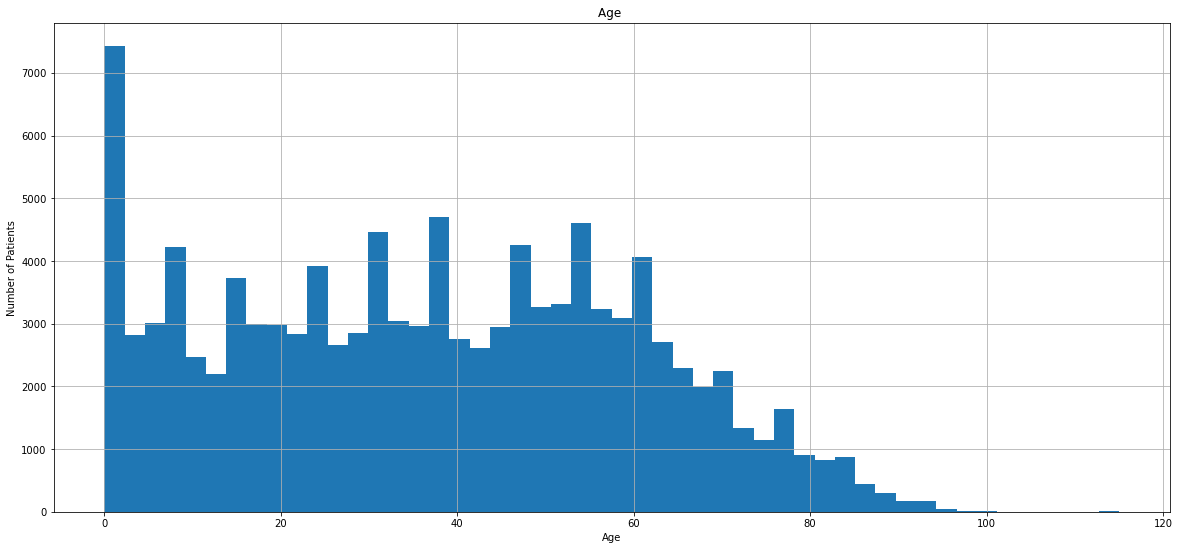

In [15]:
# Histogram plot of Age
df.Age.hist(bins=50,figsize=(20,9)) 
plt.xlabel("Age") 
plt.ylabel("Number of Patients") 
plt.title("Age ");

In [16]:
df.No_show.value_counts()

No     88207
Yes    22319
Name: No_show, dtype: int64

In [17]:
df.groupby(["No_show", "Age"]).size()


No_show  Age
No       0      2900
         1      1858
         2      1366
         3      1236
         4      1017
                ... 
Yes      95        6
         96        1
         97        2
         98        1
         115       3
Length: 203, dtype: int64

In [18]:
# to more clear we change the Yes and No 
miss_out = df["No_show"] == "Yes"
show_up = df["No_show"] == "No"

Text(0, 0.5, 'Number of Patients')

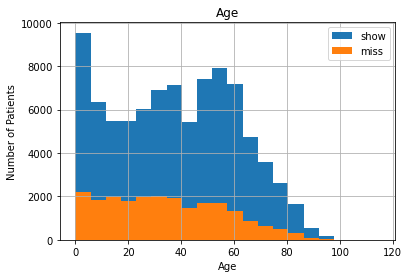

In [19]:
df[show_up].Age.hist(alpha=1, bins=20,label="show")
df[miss_out].Age.hist(alpha=1, bins=20,label="miss")
plt.legend();
plt.title("Age")
plt.xlabel("Age")
plt.ylabel("Number of Patients")

In [20]:
df.groupby("Age")["No_show"].value_counts()

Age  No_show
0    No         2900
     Yes         639
1    No         1858
     Yes         415
2    No         1366
                ... 
99   No            1
100  No            4
102  No            2
115  Yes           3
     No            2
Name: No_show, Length: 203, dtype: int64

#### Looking at the histogram, a large number of patients in the childhood age group and  between the ages of twenty to forty years did not attend their appointments.

### Research Question 2  (Is there a relationship between appointment and Not receiving SMS)

In [21]:
df.groupby(["No_show", "SMS_received"]).size()

No_show  SMS_received
No       0               62509
         1               25698
Yes      0               12535
         1                9784
dtype: int64

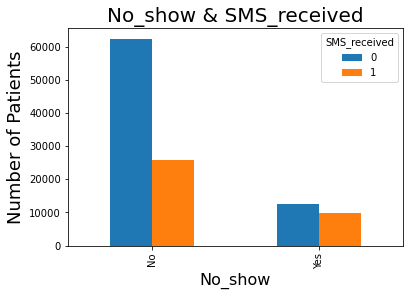

In [22]:
# Plot a bar graph based on groupby data
SMS = df.groupby(['No_show','SMS_received']).size().unstack(fill_value=0)
SMS.plot.bar()

# Set titles and axes
plt.title('No_show & SMS_received', fontsize = 20)
plt.xlabel('No_show', fontsize=16)
plt.ylabel('Number of Patients', fontsize=18)

plt.show()

#### The SMS Receive did not effect the patients to show up for their appointments as the number we seeing above in histogram.




### Research Question 3  (Is there a relationship between appointment and Gender)


In [23]:
df.groupby(["No_show", "Gender"]).size()

No_show  Gender
No       F         57245
         M         30962
Yes      F         14594
         M          7725
dtype: int64

Text(0, 0.5, 'Number of Patients')

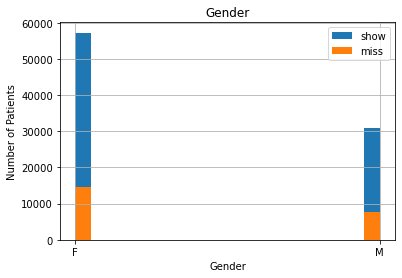

In [24]:
df[show_up].Gender.hist(alpha=1, bins=20,label="show")
df[miss_out].Gender.hist(alpha=1, bins=20,label="miss")
plt.legend();
plt.title("Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Patients")

#### Looking at the graph, it appears to us that there is influence on male patients to show up to  appointment .


<a id='conclusions'></a>
## Conclusions

### The Result :

> * Sending a SMS does not increase the patient's show up to the appointment.
> * Patients in their 60s, 70s, and 80s are more likely to show up for their appointments.
> * Females are less likely to attend appointments than males.

#### limitations:

> Some missing data may have a bigger impact, such as whether the patient is working or not, marital status, type of appointment.